# **Softmax Sample Code**

In [ ]:
# Import
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Data
x_data = [[1,2,1,1],
          [2,1,3,2],
          [3,1,3,4],
          [4,1,5,5],
          [1,7,5,5],
          [1,2,5,6],
          [1,6,6,6],
          [1,7,7,7]]

y_data = [2,2,2,1,1,1,0,0]
one_hot_dummy = tf.one_hot(y_data, depth=3).numpy()
y_data = one_hot_dummy

print(y_data)

# Conversion int-> float
x_data = np.array(x_data, dtype=np.float32)
y_data = np.array(y_data, dtype=np.float32)

print(x_data.shape,)


[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]
(8, 4) (8, 3)


In [ ]:
# Setting Weight and Bias
tf.random.set_seed(1111)

nb_class = 3
W = tf.Variable(tf.random.normal([4,nb_class], mean=0.0))
b = tf.Variable(tf.random.normal([nb_class], mean=0.0))


# Setting Hypothesis - Softmax Function
def softmax(x):
  z = tf.matmul(x,W) + b
  sm = tf.nn.softmax(z)
  return sm

# Cost Function - Cross Entropy
def cost_fn(y_actual, y_pred):
  cost = tf.reduce_mean(-tf.reduce_sum(y_actual * tf.math.log(y_pred), axis=1))
  return cost

# Setting optimizing method and learning rate
learning_rate = 0.01
optimizer = tf.optimizers.AdamW(learning_rate)

# Training
for step in range(10001):
  with tf.GradientTape() as g:
    pred = softmax(x_data)
    cost = cost_fn(y_data, pred)

    # Gradient calculation
    gradients = g.gradient(cost, [W,b])

  optimizer.apply_gradients(zip(gradients, [W,b]))

  if step % 500 == 0:
    print("step:", step, "||| Cost:", cost.)

final_W = W.numpy()
final_B = b.numpy()


step: 0 ||| Cost: tf.Tensor(4.675557, shape=(), dtype=float32)
step: 500 ||| Cost: tf.Tensor(0.42069572, shape=(), dtype=float32)
step: 1000 ||| Cost: tf.Tensor(0.28395984, shape=(), dtype=float32)
step: 1500 ||| Cost: tf.Tensor(0.20381203, shape=(), dtype=float32)
step: 2000 ||| Cost: tf.Tensor(0.14958416, shape=(), dtype=float32)
step: 2500 ||| Cost: tf.Tensor(0.1118203, shape=(), dtype=float32)
step: 3000 ||| Cost: tf.Tensor(0.0848023, shape=(), dtype=float32)
step: 3500 ||| Cost: tf.Tensor(0.06499112, shape=(), dtype=float32)
step: 4000 ||| Cost: tf.Tensor(0.050193254, shape=(), dtype=float32)
step: 4500 ||| Cost: tf.Tensor(0.038993414, shape=(), dtype=float32)
step: 5000 ||| Cost: tf.Tensor(0.030434135, shape=(), dtype=float32)
step: 5500 ||| Cost: tf.Tensor(0.023843683, shape=(), dtype=float32)
step: 6000 ||| Cost: tf.Tensor(0.018738646, shape=(), dtype=float32)
step: 6500 ||| Cost: tf.Tensor(0.014764534, shape=(), dtype=float32)
step: 7000 ||| Cost: tf.Tensor(0.011657992, shape=

In [ ]:
# Prediction
predicted = tf.argmax(softmax(x_data), axis = 1)
real = tf.argmax(y_data, axis=1)

# Accuracy
def accuracy(hypo, label):
  accuracy_data = tf.reduce_mean(tf.cast(tf.equal(hypo, label), dtype=tf.float32))
  return accuracy_data

acc = accuracy(predicted, real).numpy()
print("Accuracy:",acc)

Accuracy: 1.0


# **MNIST Classification**

In [ ]:
# Import
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# MNIST Dataset
from tensorflow.keras.datasets import mnist

In [ ]:
# Loading dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape, y_train[0]) # 60000 28x28 images, Answer, first value
print(x_test.shape, y_test.shape, y_test[0])

(60000, 28, 28) (60000,) 5
(10000, 28, 28) (10000,) 7


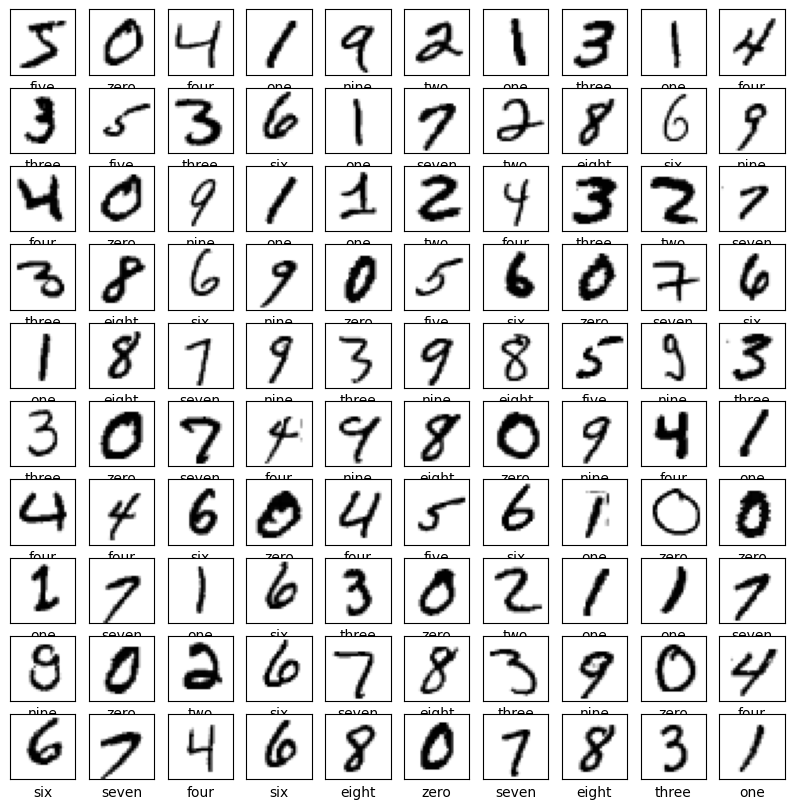

In [ ]:
class_names = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight','nine']

# Data Preview
plt.figure(figsize=(10,10))
for i in range(100):
  plt.subplot(10,10,i+1)
  plt.xticks([])
  plt.yticks([])
  img = x_train[i].reshape(28,28)
  plt.imshow(img, cmap=plt.cm.binary)
  plt.xlabel(class_names[y_train[i]])
plt.show()

In [ ]:
# Setting parameters
learning_rate = 0.01
training_steps = 1000
batch_size = 256

# MNIST dataset parameters
num_classes = 10 # 1~9
num_features = 784 # 28*28

In [ ]:
# Convert to float
x_train= np.array(x_train, dtype=np.float32)
x_test = np.array(x_test, dtype=np.float32)

# Flatten Images to 1 line - 1D vector (784x1)
x_train= x_train.reshape([-1, num_features])
x_test = x_test.reshape([-1, num_features])

x_train, x_test = x_train/255., x_test/255.

In [ ]:
# Setting Hypothesis Variables
W = tf.Variable(tf.ones([num_features, num_classes]), name="weight")
b = tf.Variable(tf.zeros([num_classes]), name="bias")

In [ ]:
# Setting Hypothesis - Softmax function
def softmax(x):
  z = tf.matmul(x,W) + b
  sm = tf.nn.softmax(z)
  return sm

def cross_entropy(y_pred, y_true):
  y_true = tf.one_hot(y_true, depth = num_classes)
  y_prd = tf.clip_by_value(y_pred, 1e-9, 1.)
  return tf.reduce_mean(-tf.reduce_sum(y_true * tf.math.log(y_pred), axis = 1))

# SGD algorithm to minimize cost function
optimizer = tf.optimizers.AdamW(learning_rate)

In [ ]:
# Accuracy
def accuracy(y_pred, y_true):
  correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
  return tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def run_optimization(x, y):
  with tf.GradientTape() as g:
    pred = softmax(x)
    cost = cross_entropy(pred, y)

    gradients = g.gradient(cost, [W, b])

    optimizer.apply_gradients(zip(gradients, [W,b]))

In [ ]:
n_train = x_train.shape[0]
n_test = x_test.shape[0]

def train_batch_maker(batch_size):
  random_idx = np.random.randint(n_train, size = batch_size)
  return x_train[random_idx], y_train[random_idx]

def test_batch_maker(batch_size):
  random_idx = np.random.randint(n_test, size = batch_size)
  return x_test[random_idx], y_test[random_idx]

In [ ]:
for step in range(training_steps):
    batch_x, batch_y = train_batch_maker(batch_size)
    run_optimization(batch_x, batch_y)

    if step % 64 == 0:
        pred = softmax(batch_x)
        cost = cross_entropy(pred, batch_y)
        acc = accuracy(pred, batch_y)
        print("step: %i, loss: %f, accuracy: %f" % (step, cost, acc))

step: 0, loss: 0.276297, accuracy: 0.953125
step: 64, loss: 0.305886, accuracy: 0.902344
step: 128, loss: 0.228369, accuracy: 0.957031
step: 192, loss: 0.179141, accuracy: 0.957031
step: 256, loss: 0.217254, accuracy: 0.921875
step: 320, loss: 0.280927, accuracy: 0.929688
step: 384, loss: 0.344403, accuracy: 0.917969
step: 448, loss: 0.305449, accuracy: 0.921875
step: 512, loss: 0.359909, accuracy: 0.906250
step: 576, loss: 0.247068, accuracy: 0.929688
step: 640, loss: 0.216565, accuracy: 0.929688
step: 704, loss: 0.247692, accuracy: 0.933594
step: 768, loss: 0.287757, accuracy: 0.898438
step: 832, loss: 0.287957, accuracy: 0.945312
step: 896, loss: 0.231130, accuracy: 0.941406
step: 960, loss: 0.298893, accuracy: 0.921875


In [ ]:
pred = softmax(x_test)
print(accuracy(pred,y_test).numpy())

0.923


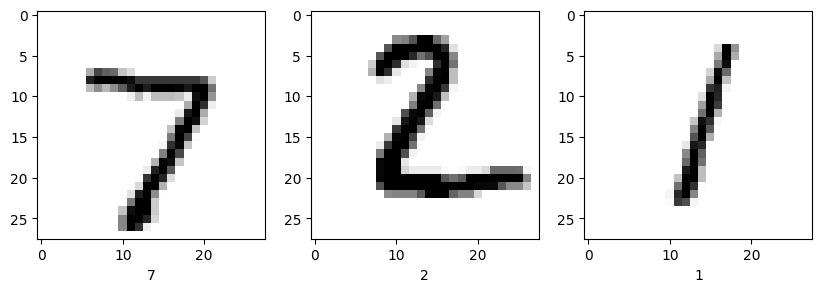

In [ ]:
n_images = 3
test_images = x_test[:n_images]
predictions = softmax(test_images)

plt.figure(figsize=(10, 10))

for i in range(n_images):
    plt.subplot(1, 3, i+1)
    plt.imshow(np.reshape(test_images[i], [28, 28]), cmap = plt.cm.binary)
    plt.xlabel(np.argmax(predictions.numpy()[i]))

plt.show()